In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,LSTM,Dropout

from sklearn.preprocessing import  MinMaxScaler

In [2]:
data_dir='BTC_USD.csv'
df= pd.read_csv(r"C:\Users\DELL\Dropbox\My PC (DESKTOP-S92PGJG)\Desktop\project\BTC_USD.csv")

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1048570,1388232120,734.60,734.60,730.00,734.55,1.789687,1313.640757,734.005698
1048571,1388232180,734.55,734.55,730.71,730.71,0.110236,80.802051,732.991499
1048572,1388232240,734.40,734.40,730.51,730.51,0.554786,407.247985,734.063488
1048573,1388232300,730.51,733.63,730.51,731.10,0.620446,453.777190,731.372707
1048574,1388232360,733.00,734.00,733.00,734.00,9.214205,6757.415227,733.369303


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1048575 non-null  int64  
 1   Open               342169 non-null   float64
 2   High               342169 non-null   float64
 3   Low                342169 non-null   float64
 4   Close              342169 non-null   float64
 5   Volume_(BTC)       342169 non-null   float64
 6   Volume_(Currency)  342169 non-null   float64
 7   Weighted_Price     342169 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 64.0 MB


In [6]:
df.describe()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.048575e+06,342169.000000,342169.000000,342169.000000,342169.000000,342169.000000,3.421690e+05,342169.000000
mean,1.356775e+09,229.456116,229.802477,229.064930,229.440478,16.274528,4.485655e+03,229.420213
std,1.816186e+07,271.716593,272.238257,271.141889,271.711086,48.128862,1.951265e+04,271.664754
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000e+00,3.800000
25%,1.341047e+09,93.490000,93.540000,93.420000,93.490000,0.989954,9.900000e+01,93.482705
50%,1.356775e+09,121.110000,121.180000,121.000000,121.090000,3.026490,3.280394e+02,121.102502
75%,1.372504e+09,194.300000,194.460000,194.150000,194.300000,12.000000,1.782326e+03,194.299996
max,1.388232e+09,1163.000000,1163.000000,1162.990000,1163.000000,2958.477574,1.543035e+06,1162.999574


In [7]:

print(df.columns)


Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


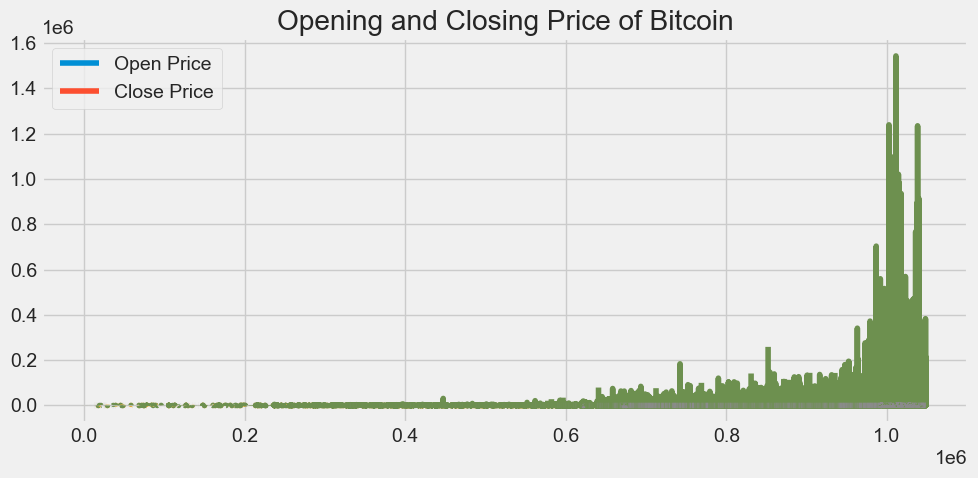

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df[r'Open'].plot()

df[r'Close'].plot()
df[r'Volume_(BTC)'].plot()
df[r'Volume_(Currency)'].plot()
df[r'Weighted_Price'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price of Bitcoin')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

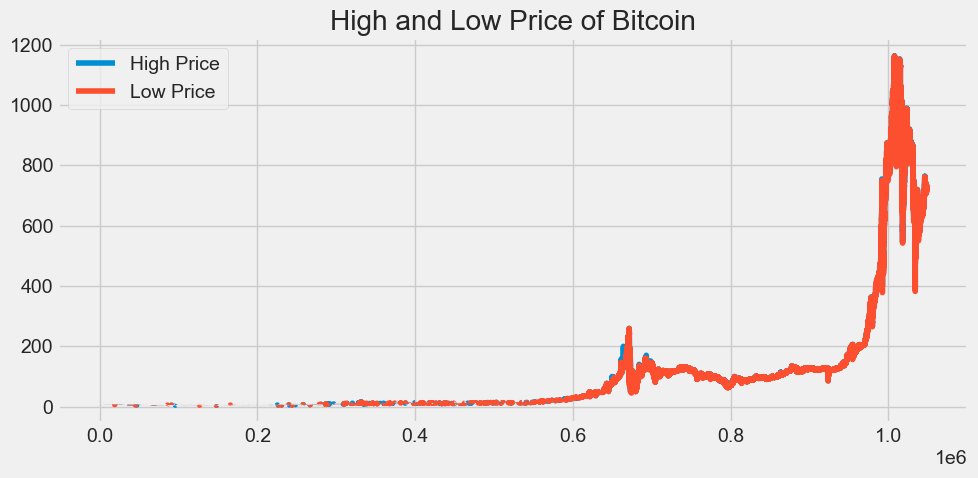

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low Price of Bitcoin')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [10]:
n_cols=1
dataset=df[r'Close']
dataset=pd.DataFrame(dataset)
data=dataset.values

data.shape

(1048575, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(data))

In [12]:
train_size=int(len(data)*0.75)
test_size=len(data)-train_size
print('Train Size:',train_size,'Test Size:',test_size)

Train Size: 786431 Test Size: 262144


In [13]:
train_data=scaled_data[0:train_size,:]
train_data.shape

(786431, 1)

In [14]:

x_train=[]
y_train=[]
time_steps=60
n_cols=1
for i in range(time_steps,len(train_data)):
    x_train.append(train_data[i-time_steps:i,:n_cols])
    y_train.append(train_data[i,:n_cols])
    if i<= time_steps:
        print('X_train:',x_train)
        print('Y_train:',y_train)

X_train: [array([[0.00050897],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
   

In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],n_cols))

In [17]:
x_train.shape,y_train.shape

((786371, 60, 1), (786371, 1))

In [18]:
model=Sequential([
    LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],n_cols)),
    LSTM(64,return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
    ])
model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [32]:
history=model.fit(x_train,y_train,)

24575/24575 [==============================] - 1074s 44ms/step - loss: nan - mean_absolute_error: nan


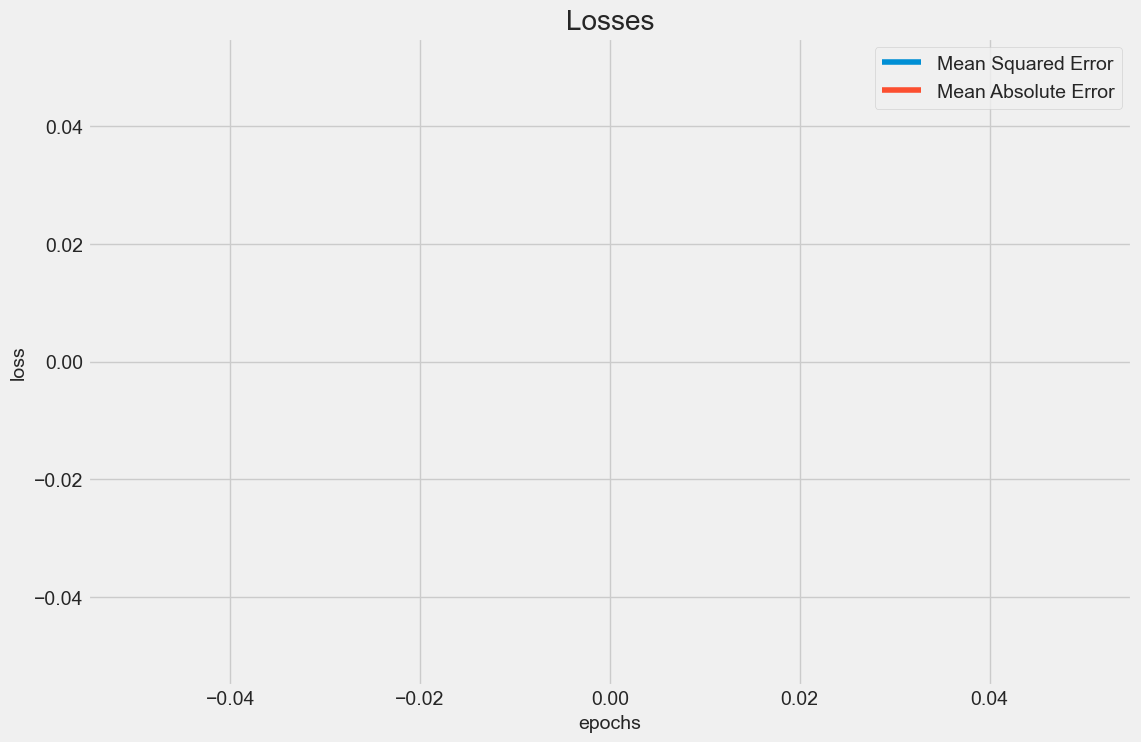

In [33]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [34]:
time_steps=60
test_data=scaled_data[train_size-time_steps:,:]
x_test=[]
y_test=[]
n_cols=1

for i in range(time_steps,len(test_data)):
    x_test.append(test_data[i-time_steps:i,0:n_cols])
    y_test.append(test_data[i,0:n_cols])
    
x_test,y_test=np.array(x_test),np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))


In [35]:
x_test.shape,y_test.shape

((262144, 60, 1), (262144, 1))

In [24]:
predictions=model.predict(x_test)

8192/8192 [==============================] - 104s 13ms/step


In [36]:
predictions=scaler.inverse_transform(predictions)
predictions.shape

(262144, 1)

In [37]:
y_test=scaler.inverse_transform(y_test)
rmse=np.sqrt(np.mean(y_test-predictions)**2).round(2)

In [49]:
preds_acts=pd.DataFrame(columns=['Predictions','Actuals'])
preds_acts['Predictions']=predictions.flatten()
preds_acts['Actuals']=y_test.flatten()



In [50]:
preds_acts.head()

,Predictions,Actuals
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,90.33
4,NaN,90.84


In [51]:
print(preds_acts.columns)


Index(['Predictions', 'Actuals'], dtype='object')


In [52]:
# Example: Check if 'Predictions' column is present (case-sensitive)
print('Predictions' in preds_acts.columns)


True


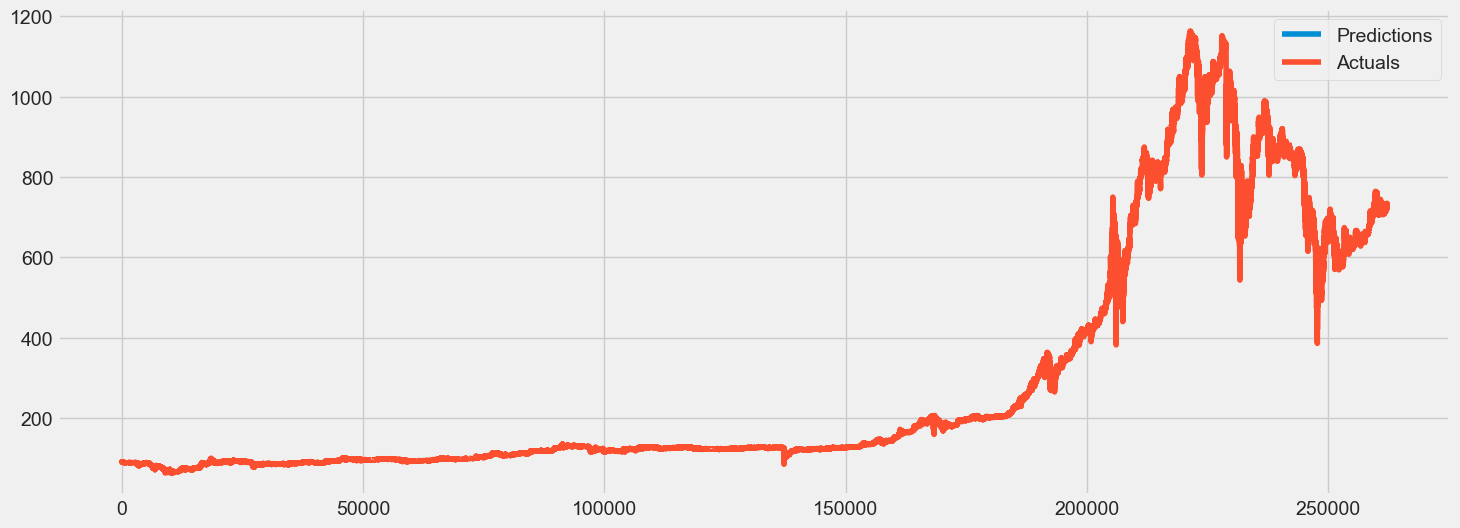

In [53]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions','Actuals'])
plt.show()

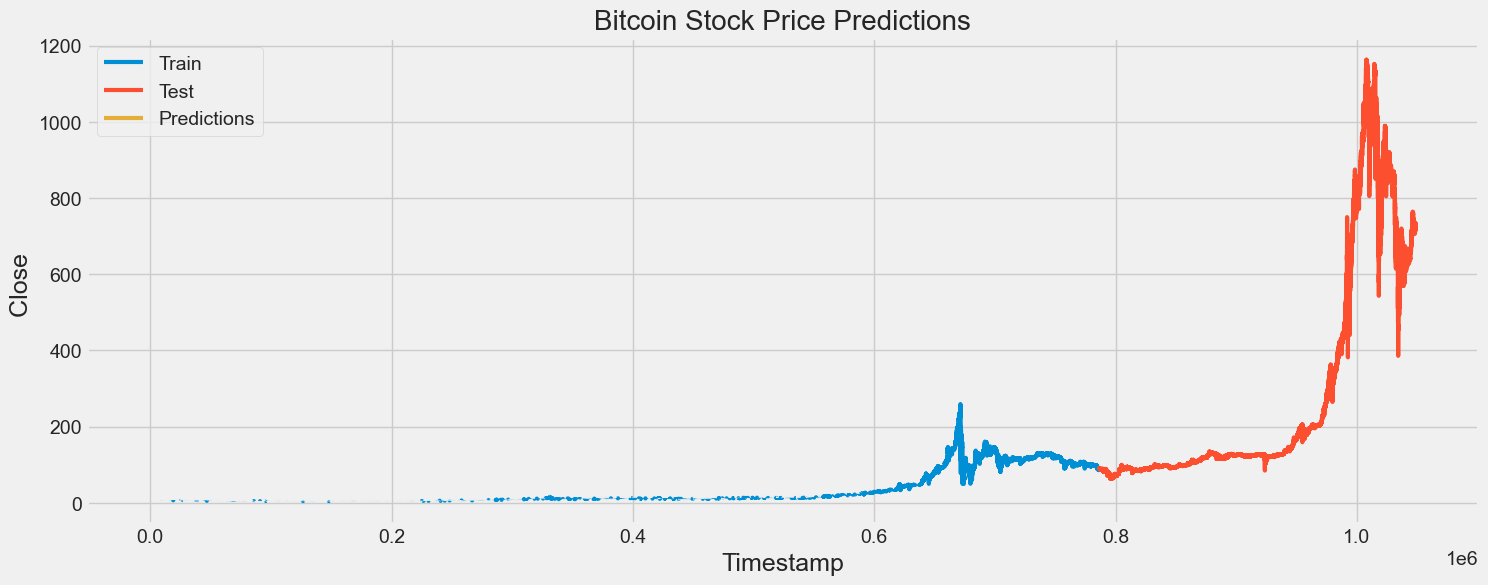

In [55]:
train=dataset.iloc[:train_size,0:1]
test=dataset.iloc[train_size:,0:1]
test['Predictions']=predictions
plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Price Predictions',fontsize=20)
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close ',fontsize=18)
plt.plot(train[r'Close'],linewidth=3)
plt.plot(test[r'Close'],linewidth=3)

plt.plot(test['Predictions'],linewidth=3)
plt.legend(['Train','Test','Predictions'])    